# Semigroup Presentations and Cayley Graphs

Presentations are a way of defining semigroups as quotients of free semigroups. They describe the useful properties of a semigroup.

For a first example, consider the presentation 

$S =  \langle a, b | a^3 = a, b^4 = b, ba = a^2b \rangle .$

Constructing the semigroup and its cayley graph from this presentation is **Question 4-5**. Here's how to do it computationally. 

In [1]:
from libsemigroups_cppyy import KnuthBendix
import networkx as nx
from pyvis.network import Network
import numpy as np

In [2]:
#Define a KB Class
kb = KnuthBendix()
kb.set_alphabet("ab")
kb.add_rule("aaa", "a")
kb.add_rule("bbbb", "b")
kb.add_rule("ba", "aab")
kb

<KnuthBendix: 2 letters and 3 rules>

In [3]:
kb.nr_active_rules()

3

In [4]:
kb.froidure_pin()

<cppyy.gbl.libsemigroups.FroidurePinBase object at 0x561cc86e04d0 held by std::shared_ptr<libsemigroups::FroidurePinBase> at 0x561cc88796c0>

In [5]:
alphabet = ['a', 'b']
semigroup = []

def makeFreeGroup(presentation):
    #make alphabet iterable
    alphabet = list(presentation.alphabet())
    #make a first "direct product"
    l = [presentation.normal_form(x+y) for x in alphabet for y in alphabet]
    boolean = True
    while boolean:
        n = len(l)
        l = list(set(l + [presentation.normal_form(x+y) for x in alphabet for y in l]))
        #terminate if the size of the semigroup stops growing
        if n==len(l):
            boolean = False
    return list(set(l))
    

In [6]:
S = makeFreeGroup(kb)
print(S)
print("Order of Semigroup:", len(S))

['ab', 'ba', 'babb', 'bb', 'abb', 'aa', 'abbb', 'bab', 'bbb', 'a', 'b']
Order of Semigroup: 11


In [16]:
G = nx.DiGraph()
for i in alphabet:
    for j in S:
        G.add_edge(j,kb.normal_form(j+i))

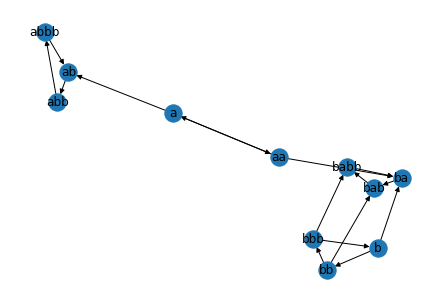

In [20]:

np.random.seed(64)
nx.draw(G, with_labels = True)

In [13]:
for x in S:
    if x == kb.normal_form(x+x):
        print(x)

babb
aa
abbb
bbb


# TS 4-6

Let S be the semigroup defined by the presentation
$S = \langle a, b, z | a^2 = b^2 = z, aba = a, bab = b, z^2 = z, za = az = bz = zb = z \rangle$.

In [40]:
#Define a KB Class
kb = KnuthBendix()
kb.set_alphabet("abz")
kb.add_rule("aa", "z")
kb.add_rule("bb", "z")
kb.add_rule("aba", "a")
kb.add_rule("bab", "b")
kb.add_rule("zz","z")
kb.add_rule("za","az")
kb.add_rule("az","bz")
kb.add_rule("bz","zb")
kb.add_rule("zb", "z")
kb

<KnuthBendix: 3 letters and 9 rules>

In [41]:
S = makeFreeGroup(kb)
print(S)
print("Order of Semigroup:", len(S))

['ab', 'z', 'b', 'ba', 'a']
Order of Semigroup: 5


# Make Cayley Table

In [42]:
for x in S:
    for y in S:
        print(kb.normal_form(x+y), end =" ")
    print(" ")

ab z z z a  
z z z z z  
b z z z ba  
z z b ba z  
z z ab a z  


# Make Right Cayley

In [43]:
G = nx.DiGraph()
for i in alphabet:
    for j in S:
        G.add_edge(j,kb.normal_form(j+i))

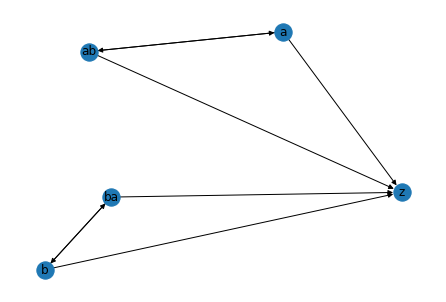

In [45]:
np.random.seed(69)
nx.draw(G, with_labels = True)